In [112]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report 

In [114]:
bank = pd.read_csv("bank-full.csv")
bank 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [115]:
dummy = pd.get_dummies(bank['y'])
dummy.head()
bank = pd.concat((bank,dummy),axis=1)
bank.head()
bank = bank.drop(['y'],axis=1)
bank.head()
bank = bank.drop(['no'],axis=1)
bank.head()
bank = bank.rename(columns={"yes":"y"})
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [116]:
bank.head(10)
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [117]:
bank.describe()  

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


<AxesSubplot:xlabel='y', ylabel='age'>

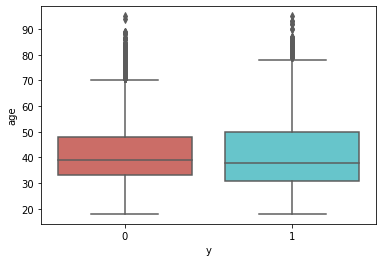

In [118]:
sb.boxplot(x="y",y="age",data=bank,palette="hls")  

In [119]:
# Droping first column 
bank.drop(["education","day","month","pdays"],inplace=True,axis = 1)
#cat_cols = ["job","marital","default","housing","loan","contact","poutcome","y"]
#cont_cols = ["age","balance","campaign","previous","duration"]

# Getting the barplot for the categorical columns 

In [120]:
bank

,age,job,marital,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y
0,58,management,married,no,2143,yes,no,unknown,261,1,0,unknown,0
1,44,technician,single,no,29,yes,no,unknown,151,1,0,unknown,0
2,33,entrepreneur,married,no,2,yes,yes,unknown,76,1,0,unknown,0
3,47,blue-collar,married,no,1506,yes,no,unknown,92,1,0,unknown,0
4,33,unknown,single,no,1,no,no,unknown,198,1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,no,825,no,no,cellular,977,3,0,unknown,1
45207,71,retired,divorced,no,1729,no,no,cellular,456,2,0,unknown,1
45208,72,retired,married,no,5715,no,no,cellular,1127,5,3,success,1
45209,57,blue-collar,married,no,668,no,no,telephone,508,4,0,unknown,0


<AxesSubplot:xlabel='y', ylabel='count'>

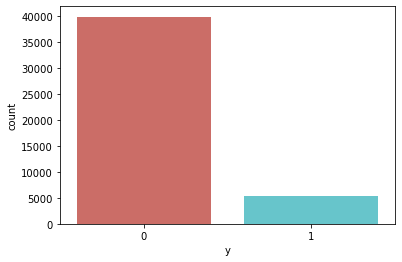

In [121]:
sb.countplot(x="y",data=bank,palette="hls") 

In [122]:
pd.crosstab(bank.y,bank.campaign) 

campaign,1,2,3,4,5,6,7,8,9,10,...,39,41,43,44,46,50,51,55,58,63
y,,,,,,,,,,,,,,,,,,,,,
0,14983,11104,4903,3205,1625,1199,688,508,306,252,...,1,2,3,1,1,2,1,1,1,1
1,2561,1401,618,317,139,92,47,32,21,14,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='campaign'>

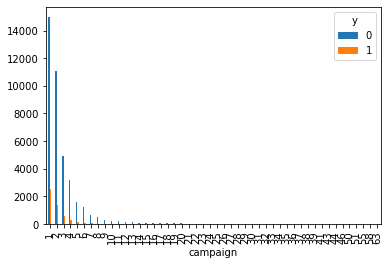

In [123]:
pd.crosstab(bank.campaign,bank.y).plot(kind = 'bar')  

<AxesSubplot:xlabel='poutcome', ylabel='count'>

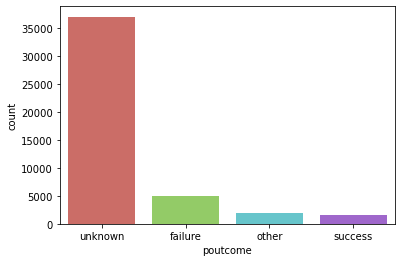

In [124]:
sb.countplot(x="poutcome",data=bank,palette="hls")

<AxesSubplot:xlabel='job', ylabel='count'>

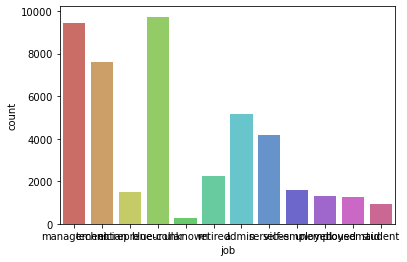

In [125]:
sb.countplot(x="job",data=bank,palette="hls")

<AxesSubplot:xlabel='marital', ylabel='count'>

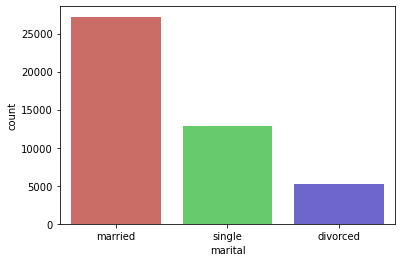

In [126]:
sb.countplot(x="marital",data=bank,palette="hls")

<AxesSubplot:xlabel='default', ylabel='count'>

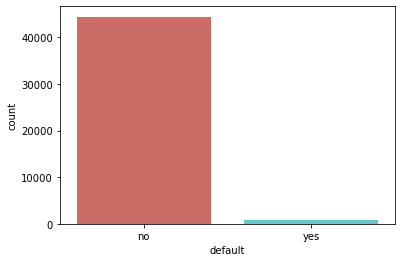

In [127]:
sb.countplot(x="default",data=bank,palette="hls")

<AxesSubplot:xlabel='housing', ylabel='count'>

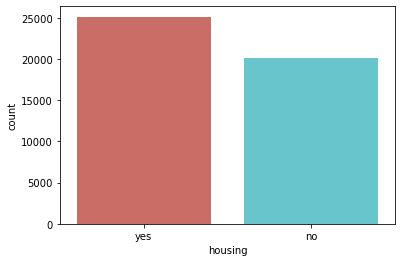

In [128]:
sb.countplot(x="housing",data=bank,palette="hls")

<AxesSubplot:xlabel='loan', ylabel='count'>

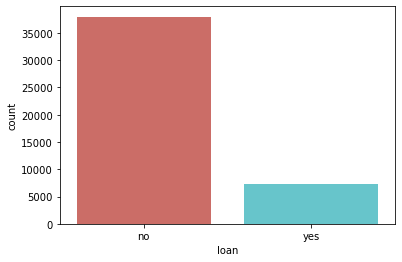

In [129]:
sb.countplot(x="loan",data=bank,palette="hls")

<AxesSubplot:xlabel='campaign', ylabel='count'>

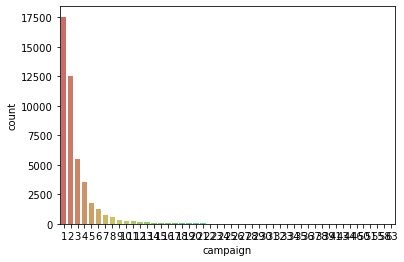

In [130]:
sb.countplot(x="campaign",data=bank,palette="hls")

<AxesSubplot:xlabel='poutcome'>

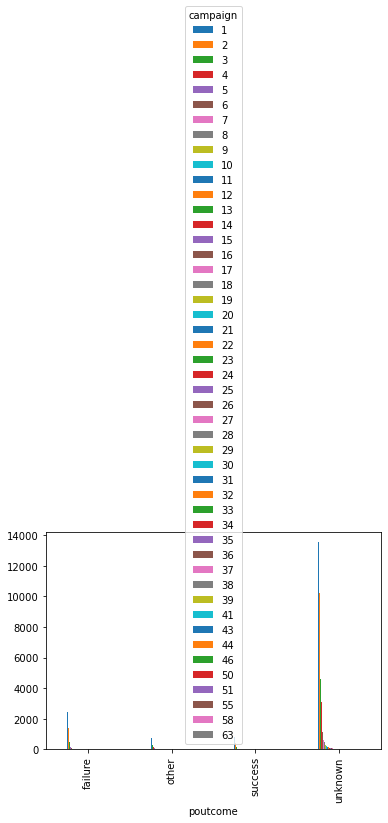

In [131]:
pd.crosstab(bank.poutcome,bank.campaign).plot(kind="bar")  

<AxesSubplot:xlabel='job'>

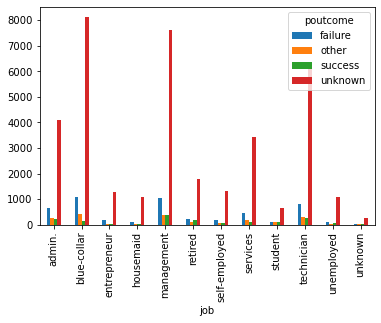

In [132]:
pd.crosstab(bank.job,bank.poutcome).plot(kind="bar")  

In [133]:
# Model building 
from sklearn.linear_model import LogisticRegression
bank.shape  

(45211, 13)

In [134]:
X = bank.iloc[:,[0,4,8,9,10]]
Y = bank.iloc[:,12]
classifier = LogisticRegression()
classifier.fit(X,Y) 

C:\Users\anbuc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [135]:
classifier.coef_  # coefficients of features   

array([[ 7.46693821e-03,  3.62448714e-05,  3.60627070e-03,
        -1.39885712e-01,  1.35720488e-01]])

In [136]:
classifier.predict_proba (X) # Probability values  

array([[0.88575189, 0.11424811],
       [0.93251079, 0.06748921],
       [0.95163928, 0.04836072],
       ...,
       [0.23928773, 0.76071227],
       [0.83724909, 0.16275091],
       [0.61329706, 0.38670294]])

In [137]:
y_pred = classifier.predict(X)
bank["y_pred"] = y_pred
bank

,age,job,marital,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y,y_pred
0,58,management,married,no,2143,yes,no,unknown,261,1,0,unknown,0,0
1,44,technician,single,no,29,yes,no,unknown,151,1,0,unknown,0,0
2,33,entrepreneur,married,no,2,yes,yes,unknown,76,1,0,unknown,0,0
3,47,blue-collar,married,no,1506,yes,no,unknown,92,1,0,unknown,0,0
4,33,unknown,single,no,1,no,no,unknown,198,1,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,no,825,no,no,cellular,977,3,0,unknown,1,1
45207,71,retired,divorced,no,1729,no,no,cellular,456,2,0,unknown,1,0
45208,72,retired,married,no,5715,no,no,cellular,1127,5,3,success,1,1
45209,57,blue-collar,married,no,668,no,no,telephone,508,4,0,unknown,0,0


In [138]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank,y_prob],axis=1)
new_df  

,age,job,marital,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y,y_pred,0,1
0,58,management,married,no,2143,yes,no,unknown,261,1,0,unknown,0,0,0.885752,0.114248
1,44,technician,single,no,29,yes,no,unknown,151,1,0,unknown,0,0,0.932511,0.067489
2,33,entrepreneur,married,no,2,yes,yes,unknown,76,1,0,unknown,0,0,0.951639,0.048361
3,47,blue-collar,married,no,1506,yes,no,unknown,92,1,0,unknown,0,0,0.940629,0.059371
4,33,unknown,single,no,1,no,no,unknown,198,1,0,unknown,0,0,0.926870,0.073130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,no,825,no,no,cellular,977,3,0,unknown,1,1,0.461523,0.538477
45207,71,retired,divorced,no,1729,no,no,cellular,456,2,0,unknown,1,0,0.802606,0.197394
45208,72,retired,married,no,5715,no,no,cellular,1127,5,3,success,1,1,0.239288,0.760712
45209,57,blue-collar,married,no,668,no,no,telephone,508,4,0,unknown,0,0,0.837249,0.162751


In [139]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix) 

[[39278   644]
 [ 4388   901]]


In [140]:
pd.crosstab(y_pred,Y)  

y,0,1
row_0,,
0,39278,4388
1,644,901


In [141]:
#type(y_pred)
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy 

0.8886996527393776

In [142]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))  

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.58      0.17      0.26      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [143]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

0.5771110538304468

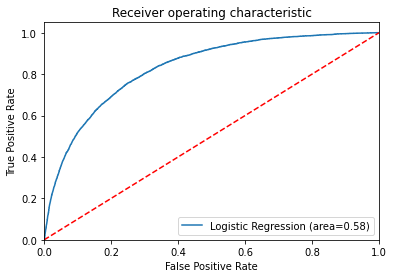

In [144]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [145]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 

In [146]:
y_prob1 

,0
0,0.114248
1,0.067489
2,0.048361
3,0.059371
4,0.073130
...,...
45206,0.538477
45207,0.197394
45208,0.760712
45209,0.162751


In [147]:
import statsmodels.api as sm  

In [148]:
logit = sm.Logit(Y, X)   

In [149]:
logit.fit().summary()  

C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45206
Method:                           MLE   Df Model:                            4
Date:                Tue, 26 Oct 2021   Pseudo R-squ.:                     inf
Time:                        11:44:13   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0600      0.001    -74.184      0.000      -0.062      -0.058
balance     3.566e-05    4.3e-06      8.303      0.000    2.72e-05    4.41e-05
duration       0.0030    5.3e-05     56.825      0.000       0.003       0.003
campaign      -0.2863      0.011    -25.851      0.000      -0.308      -0.265
previous       0.1124      0.007     16.975      0.000       0.099       0.125
==============================================================================
"""

In [150]:
fpr 

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.90481439e-01, 9.90481439e-01, 1.00000000e+00])

In [151]:
tpr  

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [152]:
## Preparing a Model

In [153]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('y~age+balance+duration+campaign+previous',data=bank).fit()

In [154]:
#Coefficients
model.params

Intercept   -0.040087
age          0.000699
balance      0.000004
duration     0.000487
campaign    -0.003806
previous     0.012678
dtype: float64

In [155]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -6.869067
age           5.359674
balance       9.299662
duration     90.685059
campaign     -8.514306
previous     21.164395
dtype: float64 
 Intercept    6.545701e-12
age          8.377971e-08
balance      1.469753e-20
duration     0.000000e+00
campaign     1.726654e-17
previous     6.153679e-99
dtype: float64


In [156]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.1679373042671326, 0.16784527211408173)

In [157]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1825.
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:44:28   Log-Likelihood:                -8678.4
No. Observations:               45211   AIC:                         1.737e+04
Df Residuals:                   45205   BIC:                         1.742e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0401      0.006     -6.869      0.000      -0.052      -0.029
age            0.0007      0.000      5.360      0.000       0.000       0.001
balance     4.234e-06   4.55e-07      9.300      0.000    3.34e-06    5.13e-06
duration       0.0005   5.37e-06     90.685      0.000       0.000       0.000
campaign      -0.0038      0.000     -8.514      0.000      -0.005      -0.003
previous       0.0127      0.001     21.164      0.000       0.012       0.014
==============================================================================
Omnibus:                    16386.586   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59617.160
Skew:                           1.829   Prob(JB):                         0.00
Kurtosis:                       7.274   Cond. No.                     1.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
##Simple Linear Regression Models

In [159]:
ml_v=smf.ols('y~age',data = bank).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    14.259143
age           5.350255
dtype: float64 
 Intercept    4.950310e-46
age          8.825644e-08
dtype: float64


In [160]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.63
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           8.83e-08
Time:                        11:44:34   Log-Likelihood:                -12820.
No. Observations:               45211   AIC:                         2.564e+04
Df Residuals:                   45209   BIC:                         2.566e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0858      0.006     14.259      0.000       0.074       0.098
age            0.0008      0.000      5.350      0.000       0.000       0.001
==============================================================================
Omnibus:                    19981.078   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68220.614
Skew:                           2.382   Prob(JB):                         0.00
Kurtosis:                       6.678   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
ml_w=smf.ols('y~previous',data = bank).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    70.510338
previous     19.910901
dtype: float64 
 Intercept    0.000000e+00
previous     7.801830e-88
dtype: float64


In [162]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.63
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           8.83e-08
Time:                        11:44:38   Log-Likelihood:                -12820.
No. Observations:               45211   AIC:                         2.564e+04
Df Residuals:                   45209   BIC:                         2.566e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0858      0.006     14.259      0.000       0.074       0.098
age            0.0008      0.000      5.350      0.000       0.000       0.001
==============================================================================
Omnibus:                    19981.078   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68220.614
Skew:                           2.382   Prob(JB):                         0.00
Kurtosis:                       6.678   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
ml_wv=smf.ols('y~age+previous',data = bank).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  
ml_wv.summary()

Intercept    13.061621
age           5.347947
previous     19.910072
dtype: float64 
 Intercept    6.417498e-39
age          8.938855e-08
previous     7.931079e-88
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     212.6
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           1.21e-92
Time:                        11:44:40   Log-Likelihood:                -12623.
No. Observations:               45211   AIC:                         2.525e+04
Df Residuals:                   45208   BIC:                         2.528e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0784      0.006     13.062      0.000       0.067       0.090
age            0.0008      0.000      5.348      0.000       0.000       0.001
previous       0.0130      0.001     19.910      0.000       0.012       0.014
==============================================================================
Omnibus:                    19830.072   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70831.797
Skew:                           2.319   Prob(JB):                         0.00
Kurtosis:                       7.012   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
## Calculating VIF

In [165]:
rsq_age = smf.ols('age~+balance+duration+campaign+previous',data=bank).fit().rsquared  
vif_age = 1/(1-rsq_age) 

rsq_balance = smf.ols('balance~+age+duration+campaign+previous',data=bank).fit().rsquared  
vif_balance = 1/(1-rsq_balance) 

rsq_duration = smf.ols('duration~+age+balance+campaign+previous',data=bank).fit().rsquared  
vif_duration = 1/(1-rsq_duration) 

rsq_campaign = smf.ols('campaign~+age+balance+duration+previous',data=bank).fit().rsquared  
vif_campaign = 1/(1-rsq_campaign) 

rsq_previous = smf.ols('previous~+age+balance+duration+campaign',data=bank).fit().rsquared  
vif_previous = 1/(1-rsq_previous) 

# Storing vif values in a data frame
d1 = {'Variables':['age','balance','duration','campaign','previous'],'VIF':[vif_age,vif_balance,vif_duration,vif_campaign,vif_previous]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,age,1.009733
1,balance,1.010591
2,duration,1.007667
3,campaign,1.008477
4,previous,1.001347


In [166]:
## Residual Analysis

In [167]:
## Test for Normality of Residuals (Q-Q Plot)

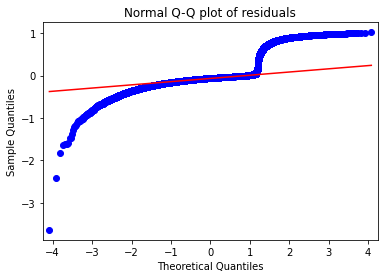

In [168]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [169]:
list(np.where(model.resid>5)) 

[array([], dtype=int64)]

In [170]:
##  Residual Plot for Homoscedasticity

In [171]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

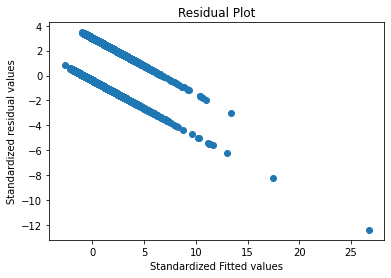

In [172]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [173]:
## Residual Vs Regressors

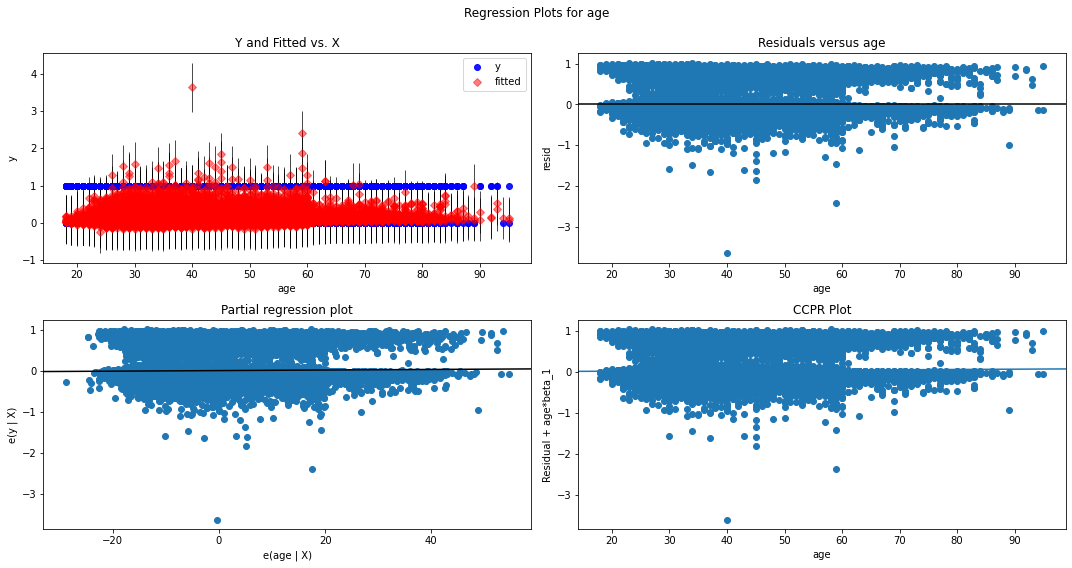

In [174]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)
plt.show()

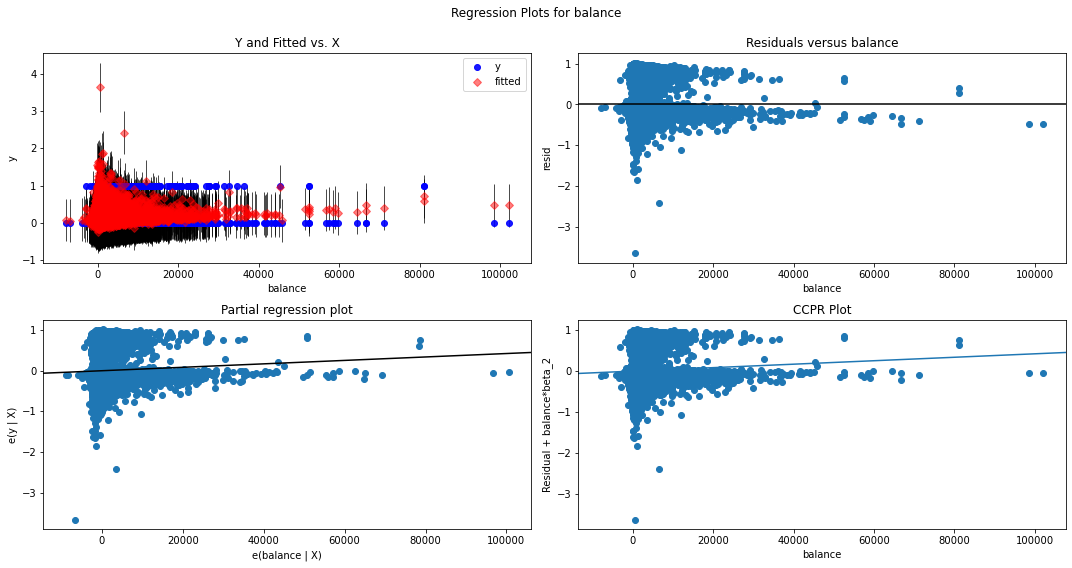

In [175]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "balance", fig=fig)
plt.show()

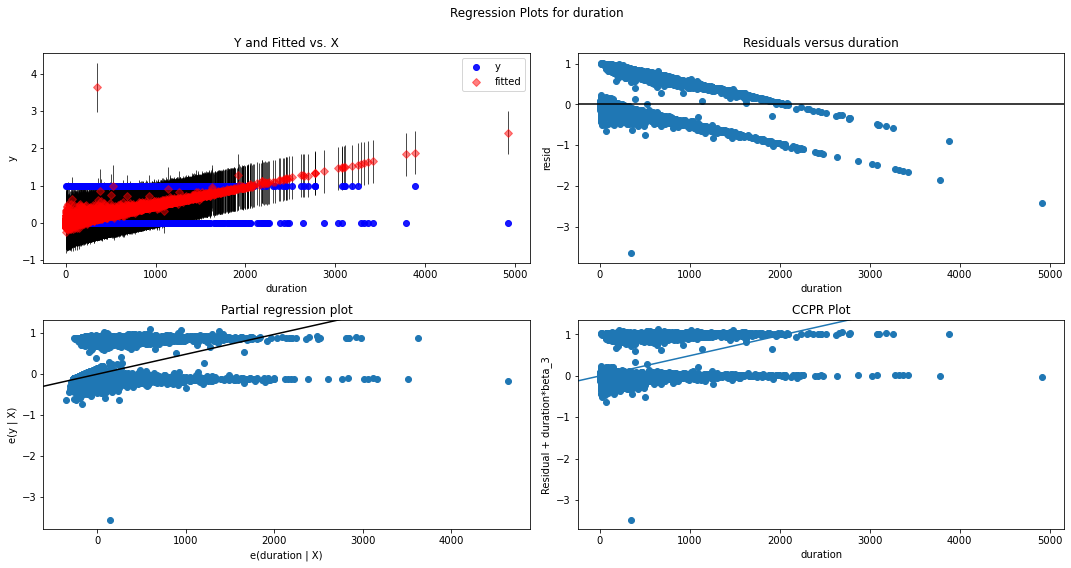

In [176]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "duration", fig=fig)
plt.show()

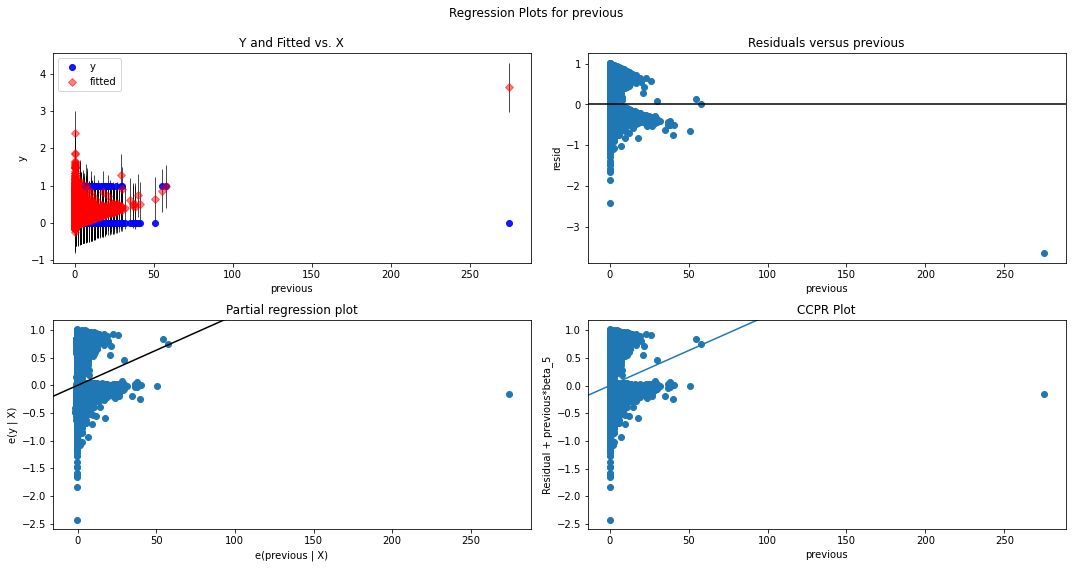

In [177]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "previous", fig=fig)
plt.show()

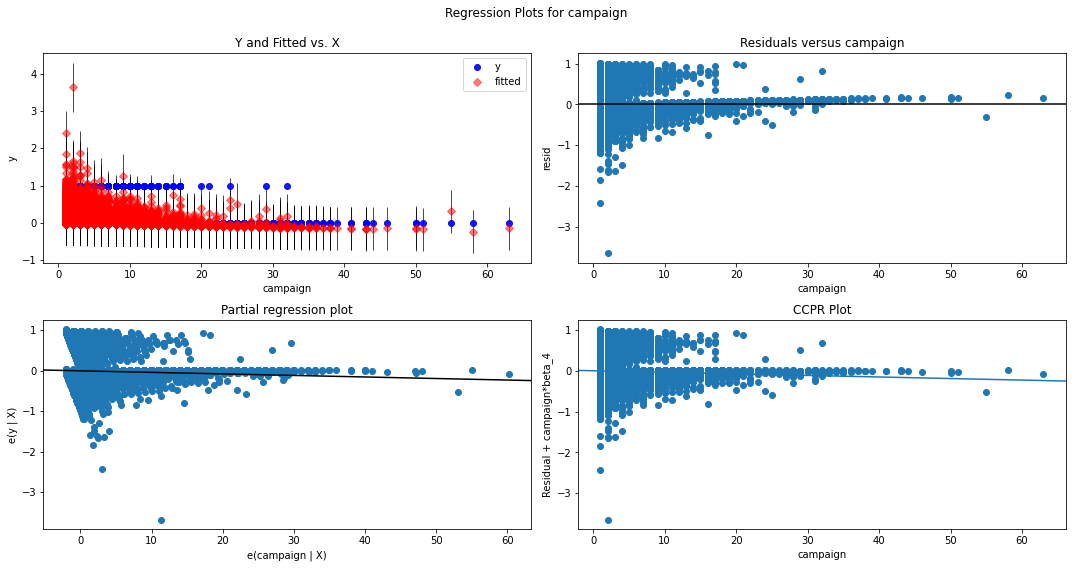

In [178]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "campaign", fig=fig)
plt.show()

In [179]:
## Model Deletion Diagnostics

In [180]:
## Detecting Influencers/Outliers

In [183]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

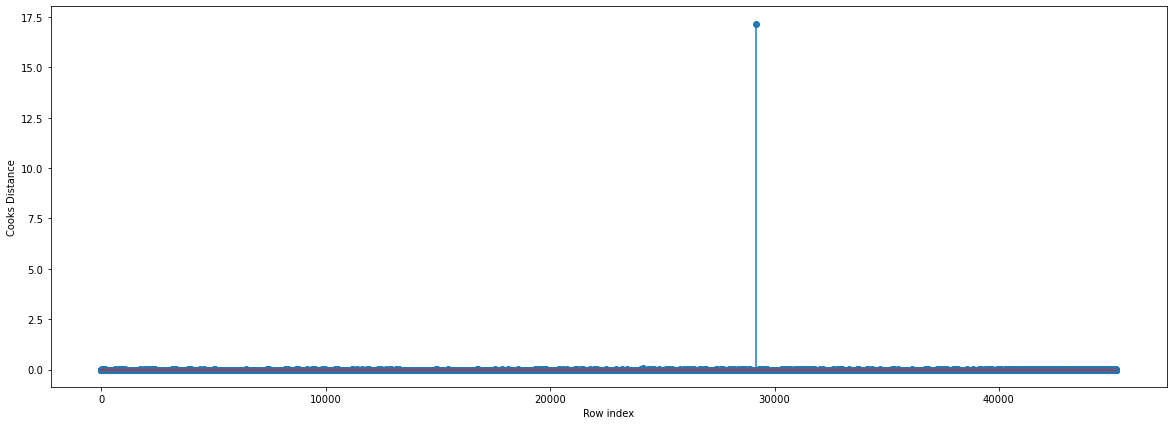

In [184]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(bank)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [185]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(29182, 17.171785761727012)

In [184]:
## High Influence points

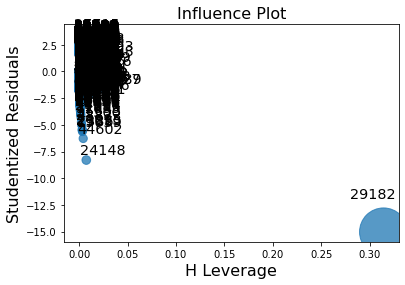

In [186]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [187]:
k = bank.shape[1]
n = bank.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.0009953329941828316

In [187]:
## From the above plot, it is evident that data point 29182 is the influencers

In [189]:
bank[bank.index.isin([29182])]

,age,job,marital,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y,y_pred
29182,40,management,married,no,543,yes,no,cellular,349,2,275,other,0,1


In [190]:
bank.head()

,age,job,marital,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y,y_pred
0,58,management,married,no,2143,yes,no,unknown,261,1,0,unknown,0,0
1,44,technician,single,no,29,yes,no,unknown,151,1,0,unknown,0,0
2,33,entrepreneur,married,no,2,yes,yes,unknown,76,1,0,unknown,0,0
3,47,blue-collar,married,no,1506,yes,no,unknown,92,1,0,unknown,0,0
4,33,unknown,single,no,1,no,no,unknown,198,1,0,unknown,0,0


In [48]:
##  Improving the model

In [191]:
#Load the data
bank = pd.read_csv("bank-full.csv")

In [193]:
dummy = pd.get_dummies(bank['y'])
dummy.head()
bank = pd.concat((bank,dummy),axis=1)
bank.head()
bank = bank.drop(['y'],axis=1)
bank.head()
bank = bank.drop(['no'],axis=1)
bank.head()
bank = bank.rename(columns={"yes":"y"})
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [194]:
#Discard the data points which are influencers and reasign the row number (reset_index())
bank1=bank.drop(bank.index[[29182]],axis=0).reset_index()
bank1

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45206,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45207,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45208,45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [195]:
#Drop the original index
bank1=bank1.drop(['index'],axis=1)

In [196]:
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45206,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45207,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45208,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [223]:
## Build Model

In [197]:
#Exclude variable "age" and generate R-Squared and AIC values
final_ml_V= smf.ols('y~previous+campaign+balance+duration',data = bank1).fit()

In [198]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.17154282853171998, 17170.903105869118)

In [199]:
#Exclude variable "previous" and generate R-Squared and AIC values
final_ml_V= smf.ols('y~balance+campaign+age+duration',data = bank1).fit()

In [200]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.1596955100579236, 17812.84770426579)

In [20]:
## Cooks Distance

In [201]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

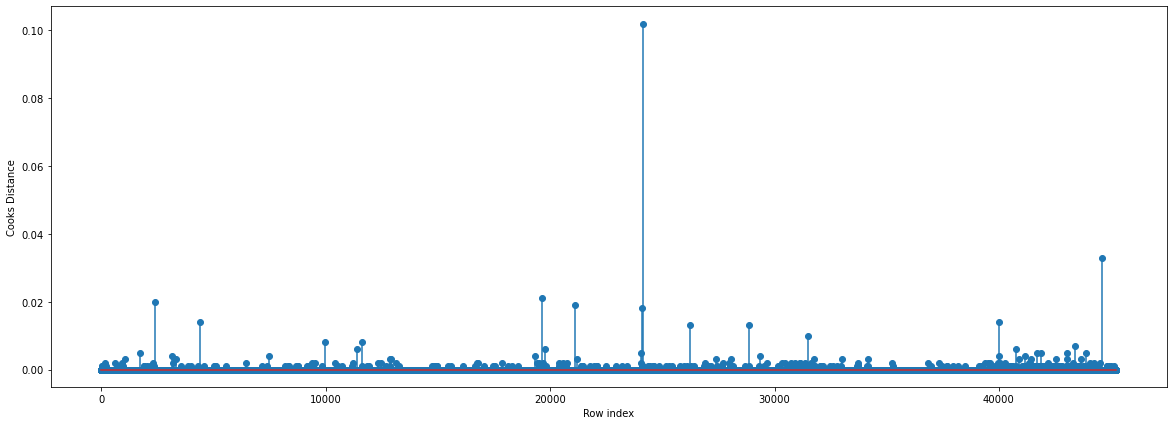

In [202]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(bank1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [203]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(24148, 0.10196752162480131)

In [216]:
#Drop 24148 observation
bank2=bank1.drop(bank1.index[[24148]],axis=0)

In [217]:
bank2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45206,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45207,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45208,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [218]:
bank3=bank2.reset_index()

In [219]:
bank4=bank3.drop(['index'],axis=1)

In [220]:
bank4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45205,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45206,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45207,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [224]:
#Build the model on the new data
final_ml_V= smf.ols('y~previous+campaign+balance+duration',data = bank4).fit()

In [225]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

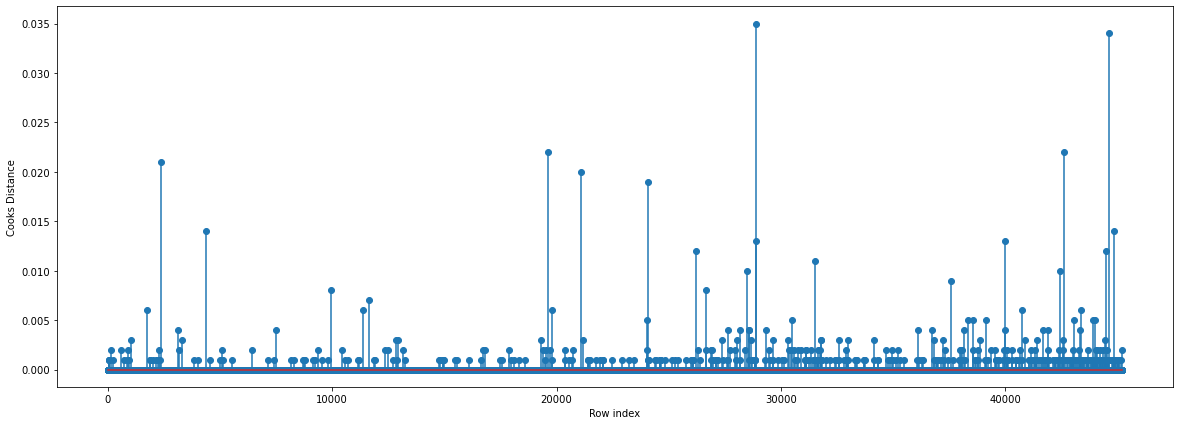

In [227]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(bank4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [228]:
(np.argmax(c_V),np.max(c_V))

(28885, 0.03482522575393314)

In [229]:
## Since the value is <1 , we can stop the diagnostic process and finalize the model

In [230]:
#Check the accuracy of the mode
final_ml_V= smf.ols('y~previous+campaign+balance+duration',data = bank4).fit()

In [231]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.1727903193375797, 17103.264008180893)